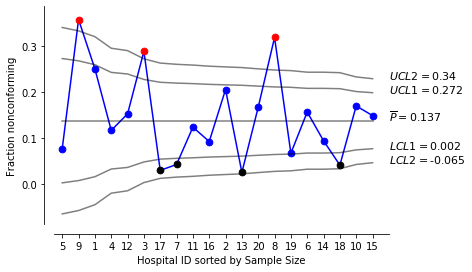

In [13]:
#Script 5.1
#FUNNEL CHARTS
#import modules
from pandas import*
from pylab import*
from numpy import*
import seaborn as sns
#import data from Excel where columns are named: ID, Discharges, and Readmits. Discharges are considered the sample size.
data = read_excel()#upload Chap5.xlsx funnel tab
#Initialization
data['xt'] = data.Readmits/data.Discharges
data = data.sort_values(by='Discharges')
data = data.reset_index()
nbar = mean(data.Discharges)
xr = data.xt
CL = [pbar]*(len(xr))
t = arange(len(xr) )
#L = 3
pbar = 1.*data.Readmits.sum()/ data.Discharges.sum()
UCL2 = [pbar + 3.*sqrt(pbar*(1.-pbar)/data.Discharges[i])  for i in range(len(xr))]
LCL2 =  [pbar - 3.*sqrt(pbar*(1.-pbar)/data.Discharges[i])  for i in range(len(xr))]
#L =2
UCL1 = [pbar + 2.*sqrt(pbar*(1.-pbar)/data.Discharges[i])  for i in range(len(xr))]
LCL1 =  [pbar - 2.*sqrt(pbar*(1.-pbar)/data.Discharges[i])  for i in range(len(xr))]
#mark red the point that falls outside of the outer control limits. Otherwise, mark the point blue.
#mark black the point that falls outside of the inner control limits. Otherwise, mark the point blue.
markers = []
colors = []
for i in range (len(xr)):
    x1 = xr[i]
    if (x1 > UCL2[i] or  x1 < LCL2[i]):
        markers.append('o')
        colors.append('r')
    else:
        markers.append('o')
        colors.append('b')
colors = array(colors)
for i in range (len(xr)):
    x1 = xr[i]
    if (x1 > UCL1[i] and x1 < UCL2[i]):
        colors[i]='k'
    if (x1 < LCL1[i] and x1 > LCL2[i]):
        colors[i]='k'     
#Plotting the funnel chart
fig=figure()
ax1 =  fig.add_subplot(111)
ax1.plot(t, UCL2, 'k-', alpha = 0.5)
ax1.plot(t, LCL2, 'k-',alpha = 0.5)
ax1.plot(t, UCL1, 'k-', alpha = 0.5)
ax1.plot(t, LCL1, 'k-',alpha = 0.5)
ax1.plot(CL, 'k-',alpha = 0.5)
ax1.plot(xr,'b-',zorder=1)
for x,y,c,m in zip(t, xr, colors, markers):
    ax1.scatter(x,y,c=c, marker=m, s =45, alpha = 1.,zorder=2)
xlim(-0.5, t[-1]+1) 
sns.color_palette("Blues")
sns.despine(offset=10, trim=False)
#label y-axis and x-axis
ax1.set_xlabel('Hospital ID sorted by Sample Size')
ax1.set_ylabel('Fraction nonconforming')
#annotate the values of UCL, LCL, and CL
ax1.annotate ('$UCL2=$'+str(round(UCL2[0],3)), xy = (xlim()[1], list(UCL2)[-1]), xytext = (xlim()[1],list(UCL2)[-1]),fontsize = 11)
ax1.annotate ('$\overline{P}=$'+str(round(CL[0],3)), xy = (xlim()[1], list(CL)[-1]), xytext = (xlim()[1],list(CL)[-1]),fontsize = 11)
ax1.annotate ('$LCL2=$'+str(round(LCL2[0],3)), xy = (xlim()[1], list(LCL2)[-1]), xytext = (xlim()[1],list(LCL2)[-1]),fontsize = 11)
ax1.annotate ('$UCL1=$'+str(round(UCL1[0],3)), xy = (xlim()[1], list(UCL1)[-1]), xytext = (xlim()[1],list(UCL1)[-1]),fontsize = 11)
ax1.annotate ('$LCL1=$'+str(round(LCL1[0],3)), xy = (xlim()[1], list(LCL1)[-1]), xytext = (xlim()[1],list(LCL1)[-1]),fontsize = 11)
#set xticks to reflect hospital IDs sorted by sample size
xticks(arange(len(data), step = 1), data.ID)
show()


In [23]:
#Script 5.2
#RUN Statistics 
#Import modules
from pandas import *
import numpy as np
from scipy.stats import norm
#import data using Pandas. The spreadsheet has a column named "Run" to represent the data to be monitored.
data = read_excel()#upload Chap5.xlsx run tab
#initialize parameters
lenData = len(data.Run)
alpha = 0.05#significance level
Z = norm.ppf(alpha)
#count runs from running differences
signs = [0]
for i in range(1, lenData ):
    s = np.sign(data.Run[i]-data.Run[i-1])
    if s>0:
        signs.append(1)
    else:
         signs.append(-1)
runs = array([1. for i in range(1, lenData ) if signs[i] !=signs[i-1]])
rundown = array([1. for i in signs if i==-1])
runup= array([1. for i in signs if i==1])
R = runs.sum()
R1 = rundown.sum()
R2 = runup.sum()
n1 = len(rundown)
n2 = len(runup)
n = lenData
ER = (2.*n - 1.)/3.
VR = (16.*n - 29.)/90.
lower = ER-Z*sqrt(VR)
upper = ER+Z*sqrt(VR)
Z0 = (R - ER)/sqrt(VR)
p_value_trend= norm.cdf(Z0)
p_value_oscillation = 1.- p_value_trend
print ('------------------------------------------------------')
#print run statistics
if p_value_trend < alpha:
    if R<lower:
        print ('Reject the null hypothesis for trends. There are too few runs.')
        print ('The p-value for trends is %s'%round(p_value_trend,3))
        print ('The p-value for oscillation is %s'%round(1.-p_value_trend,3))   
        print ('The confidence interval is supposed to be '+str(round(min(lower, upper),2))+ ' <= R <= '+str(round(max(lower, upper),2))+', but  R = ' +str(round(R,2))+'.')
    else:
        print ('Reject the null hypothesis for trends. There are too many runs.')
        print ('The p-value for trends is %s'%round(p_value_trend,3))
        print ('The p-value for oscillation is %s'%round(1.-p_value_trend, 3))   
        print ('The confidence interval is supposed to be '+str(round(min(lower, upper),2))+ ' <= R <= '+str(round(max(lower, upper),2))+', but R = ' +str(round(R,2))+'.')
else:
    print ('Failed to reject the null hypothesis for trends')
    if p_value_oscillation <alpha:
        print ('Reject the null hypothesis for oscillation')      
    print ('The p-value for trends is %s'%round(p_value_trend,3))
    print ('The p-value for oscillation is %s'%round(1.- p_value_trend,3))
    print ('The confidence interval is '+str(round(min(lower, upper),2))+ ' <= R <= '+str(round(max(lower, upper),2))+' and R = ' +str(round(R,2))+'.')
#****************************************************************************
#count runs above and below the median statistic
median = np.median(data.Run)
signs = [0]
for i in range(0, lenData ):
    s = np.sign(data.Run[i]-median)    
    if s>0:
        signs.append(1)
    else:
         signs.append(-1)
runs = 0
for i,j in enumerate(signs):
    try:
        if signs[i+1]!=signs[i]:
            runs+=1
    except:
        pass
rundown = array([1. for i in signs if i==-1])
runup= array([1. for i in signs if i==1])
R = runs
R1 = rundown.sum()
R2 = runup.sum()
n1 = len(rundown)
n2 = len(runup)
n = lenData
ER = (2.*n1*n2/n) + 1.
VR = 2.*n1*n2*(2.*n1*n2 - n)/((n-1.)*(n**2))
lower = ER-Z*sqrt(VR)
upper = ER+Z*sqrt(VR)
Z0 = (R - ER)/sqrt(VR)
p_value_cluster = norm.cdf(Z0)
p_value_mixture = 1.- p_value_cluster 
#print run statistics
print ('------------------------------------------------------')
if p_value_cluster < alpha:
    if R<lower:
        print ('Reject the null hypothesis for clustering. There are too few runs.')         
        print ('The p-value for clustering is %s'%round(p_value_cluster,3))
        print ('The p-value for mixtures is %s'%round(1.-p_value_cluster,3)) 
        print ('The confidence interval is supposed to be '+str(round(min(lower, upper),2))+ ' <= R <= '+str(round(max(lower, upper),2))+', but R = ' +str(round(R,2))+'.')
    else:
        print ('Reject the null hypothesis for clustering. There are too many runs.')
        print ('The p-value for clustering is %s'%round(p_value_cluster,3))
        print ('The p-value for mixtures is %s'%round(1.-p_value_cluster,3))  
        print ('The confidence interval is supposed to be '+str(round(min(lower, upper),2))+ ' <= R <= '+str(round(max(lower, upper),2))+', but R = ' +str(round(R,2))+'.')
else:
    print ('Failed to reject the null hypothesis for clustering')
    if p_value_mixture <alpha:
        print ('Reject the null hypothesis for mixtures')  
    print ('The p-value for clustering is %s'%round(p_value_cluster,3))
    print ('The p-value for mixtures is %s'%round(1.-p_value_cluster,3))
    print ('The confidence interval is '+str(round(min(lower, upper),2))+ ' <= R <= '+str(round(max(lower, upper),2))+' and R = ' +str(round(R,2))+'.')
print ('------------------------------------------------------')


------------------------------------------------------
Reject the null hypothesis for trends. There are too few runs.
The p-value for trends is 0.002
The p-value for oscillation is 0.998
The confidence interval is supposed to be 22.05 <= R <= 30.62, but  R = 19.0.
------------------------------------------------------
Failed to reject the null hypothesis for clustering
The p-value for clustering is 0.168
The p-value for mixtures is 0.832
The confidence interval is 15.87 <= R <= 26.13 and R = 18.
------------------------------------------------------
